In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

In [0]:
from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv


In [0]:
data=pd.read_csv("pima-indians-diabetes.csv")

In [0]:
data.columns=['preg','glu','BP','ST','Ins','BMI','Diab','Age','Class'] 

In [0]:
type(data)

pandas.core.frame.DataFrame

In [0]:
data.shape

(767, 9)

In [0]:
data

,preg,glu,BP,ST,Ins,BMI,Diab,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [0]:
X=data[['preg','glu','BP','ST','Ins','BMI','Diab','Age']]
Y=data['Class']

In [0]:
type(X)

pandas.core.frame.DataFrame

In [0]:
Y.shape

(767,)

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3,random_state=4, stratify=Y);

In [1]:
500/767

0.651890482398957

In [0]:
type(xtrain)

pandas.core.frame.DataFrame

In [0]:
[xtrain.shape, xtest.shape,ytrain.shape,ytest.shape]

[(536, 8), (231, 8), (536,), (231,)]

In [0]:
Y.value_counts()

0    500
1    267
Name: Class, dtype: int64

In [0]:
ytrain.value_counts()

0    349
1    187
Name: Class, dtype: int64

In [0]:
ytest.value_counts()

0    151
1     80
Name: Class, dtype: int64

In [0]:
# Z Score Standardization
S=StandardScaler()
S.fit(data)
xtrain=S.fit_transform(xtrain)
xtest=S.fit_transform(xtest)

In [0]:
model=MLPClassifier(hidden_layer_sizes=(12,12,12,12,12),activation='tanh',solver='sgd',batch_size=4,max_iter=500)# MLP model definition

In [0]:
model.fit(xtrain,ytrain)# fitting the model to our data

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 12, 12, 12, 12), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_predict=model.predict(xtest)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [0]:
acc=metrics.accuracy_score(ytest,y_predict)# accuracy calculation
print(acc)

0.7012987012987013


In [0]:
cm=metrics.confusion_matrix(ytest,y_predict)
print(cm)

[[119  32]
 [ 37  43]]


In [0]:
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
sensitivity

0.5375

In [0]:
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity

0.7880794701986755

0.6627897350993378


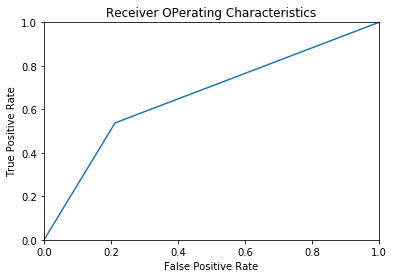

In [0]:
# ROC Plotting
fpr,tpr, _=roc_curve(ytest,y_predict)
roc_auc=auc(fpr, tpr)
print(roc_auc)
#plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver OPerating Characteristics')
plt.show()